In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,8)

In [4]:
datacovid = pd.read_csv('datasetcovidsamplejkt.csv')

datacovid.sample(5)

,Tanggal,Variant_Suspect,Day,ID_DAILY_POSITIVE,ID_DAILY_HOSPITALIZED,ID_DAILY_CURED,ID_DAILY_DEATH,JKT_DAILY_DEATH,JKT_DAILY_CURED,JKT_DAILY_ISOLATION,JKT_DAILY_HOSPITALIZED,JKT_DAILY_POSITIVE,JKT_DAILY_TESTSPECIMENT,JKT_DAILY_POSTEST,JKT_DAILY_POSTRATE,JKT_CONS_VALUE,CoF_HSE,PoF_Spec_X_PostRate,Risk,Risk_Criteria
155,3/8/2020,Alpha-Beta-Gamma,156,1679,351,1262,66,15,138,168,168,489,11922,1654,0.139,870,2,2,4,MEDIUM
698,28/01/2022,Omicron,63,9905,7870,2028,7,2,1467,2369,720,4558,39387,7905,0.201,6004,3,3,9,HIGH
400,5/4/2021,Alpha-Beta-Gamma,401,3712,-2234,5800,146,12,977,-378,-88,523,15918,2688,0.169,383,2,2,4,MEDIUM
359,23/02/2021,Alpha-Beta-Gamma,360,9775,1456,7996,323,42,1815,-402,-673,782,18340,4720,0.257,-438,1,3,3,MEDIUM
689,19/01/2022,Omicron,54,1745,1232,504,9,0,385,483,144,1012,22085,1692,0.077,1300,2,2,4,MEDIUM


<AxesSubplot:xlabel='Variant_Suspect', ylabel='JKT_DAILY_DEATH'>

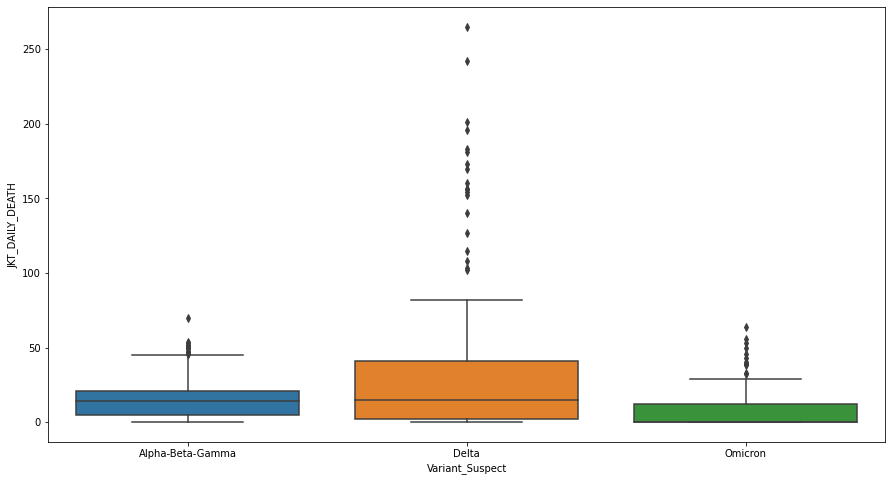

In [10]:
sns.boxplot(x="Variant_Suspect", y="JKT_DAILY_DEATH", data=datacovid)

<AxesSubplot:xlabel='Variant_Suspect', ylabel='count'>

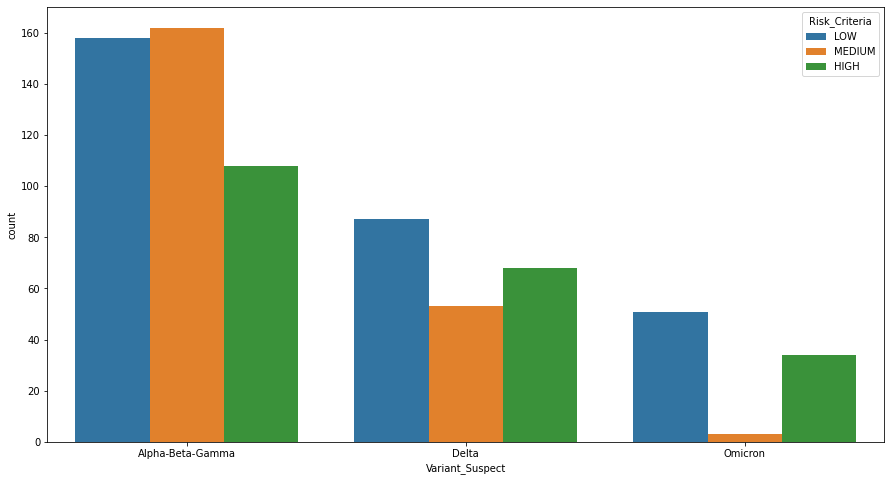

In [11]:
sns.countplot(x="Variant_Suspect", hue="Risk_Criteria", data=datacovid)

In [12]:
covid_ABG = datacovid.loc[datacovid.Variant_Suspect=='Alpha-Beta-Gamma',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTSPECIMENT','Risk','Risk_Criteria']]
covid_Delta = datacovid.loc[datacovid.Variant_Suspect=='Delta',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTSPECIMENT','Risk','Risk_Criteria']]
covid_Omicron = datacovid.loc[datacovid.Variant_Suspect=='Omicron',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTSPECIMENT','Risk','Risk_Criteria']]

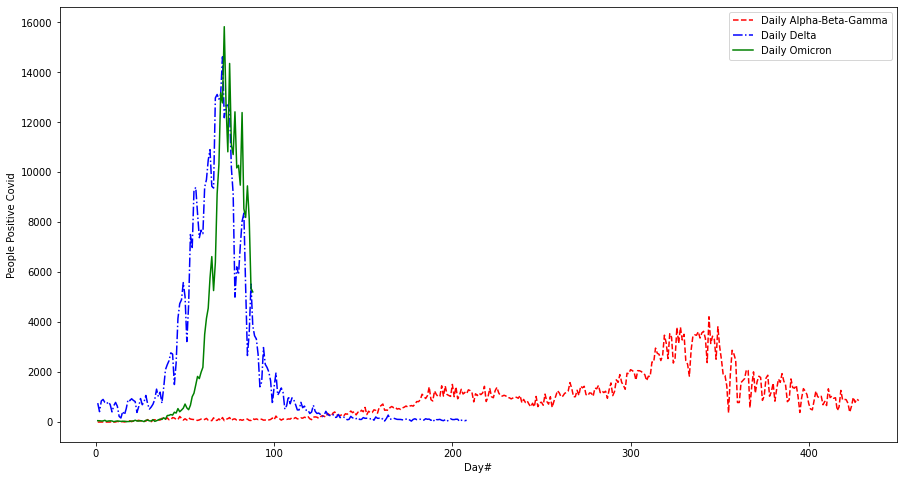

In [13]:
y1 = covid_ABG.JKT_DAILY_POSITIVE
y2 = covid_Delta.JKT_DAILY_POSITIVE
y3 = covid_Omicron.JKT_DAILY_POSITIVE

x1 = covid_ABG.Day
x2 = covid_Delta.Day
x3 = covid_Omicron.Day

plt.rcParams["figure.figsize"] = (15,8)
plt.plot(x1,y1,'--r',label="Daily Alpha-Beta-Gamma")
plt.plot(x2,y2,'-.b',label="Daily Delta")
plt.plot(x3,y3,'g', label="Daily Omicron")
plt.xlabel('Day#')
plt.ylabel('People Positive Covid')
plt.legend()
plt.show()

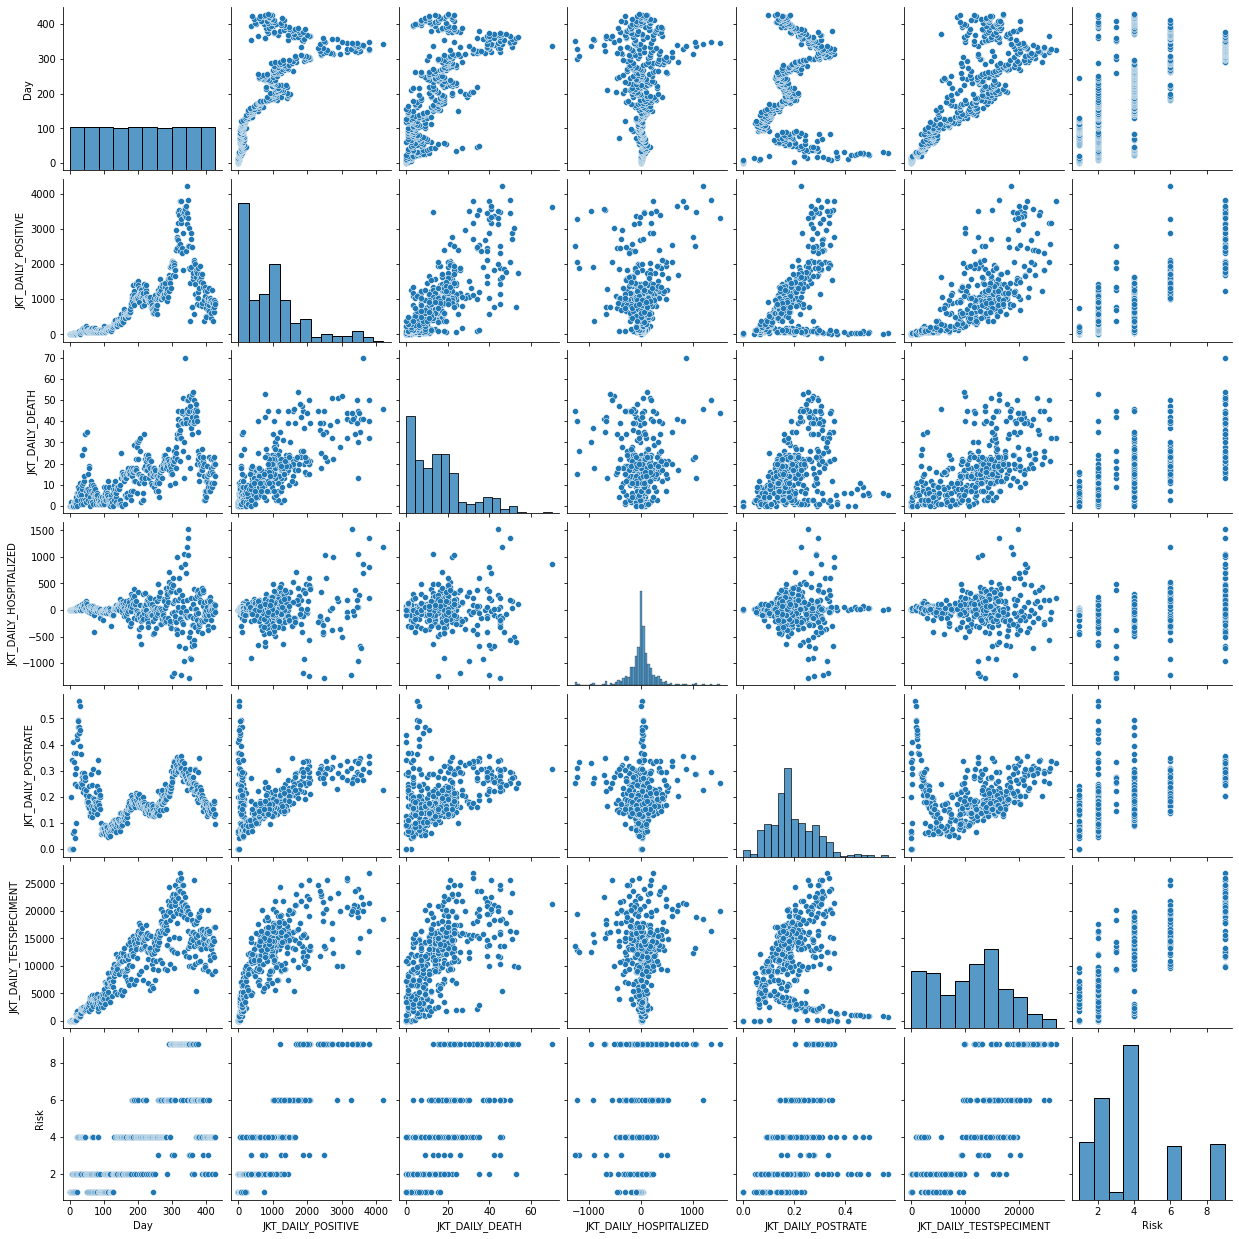

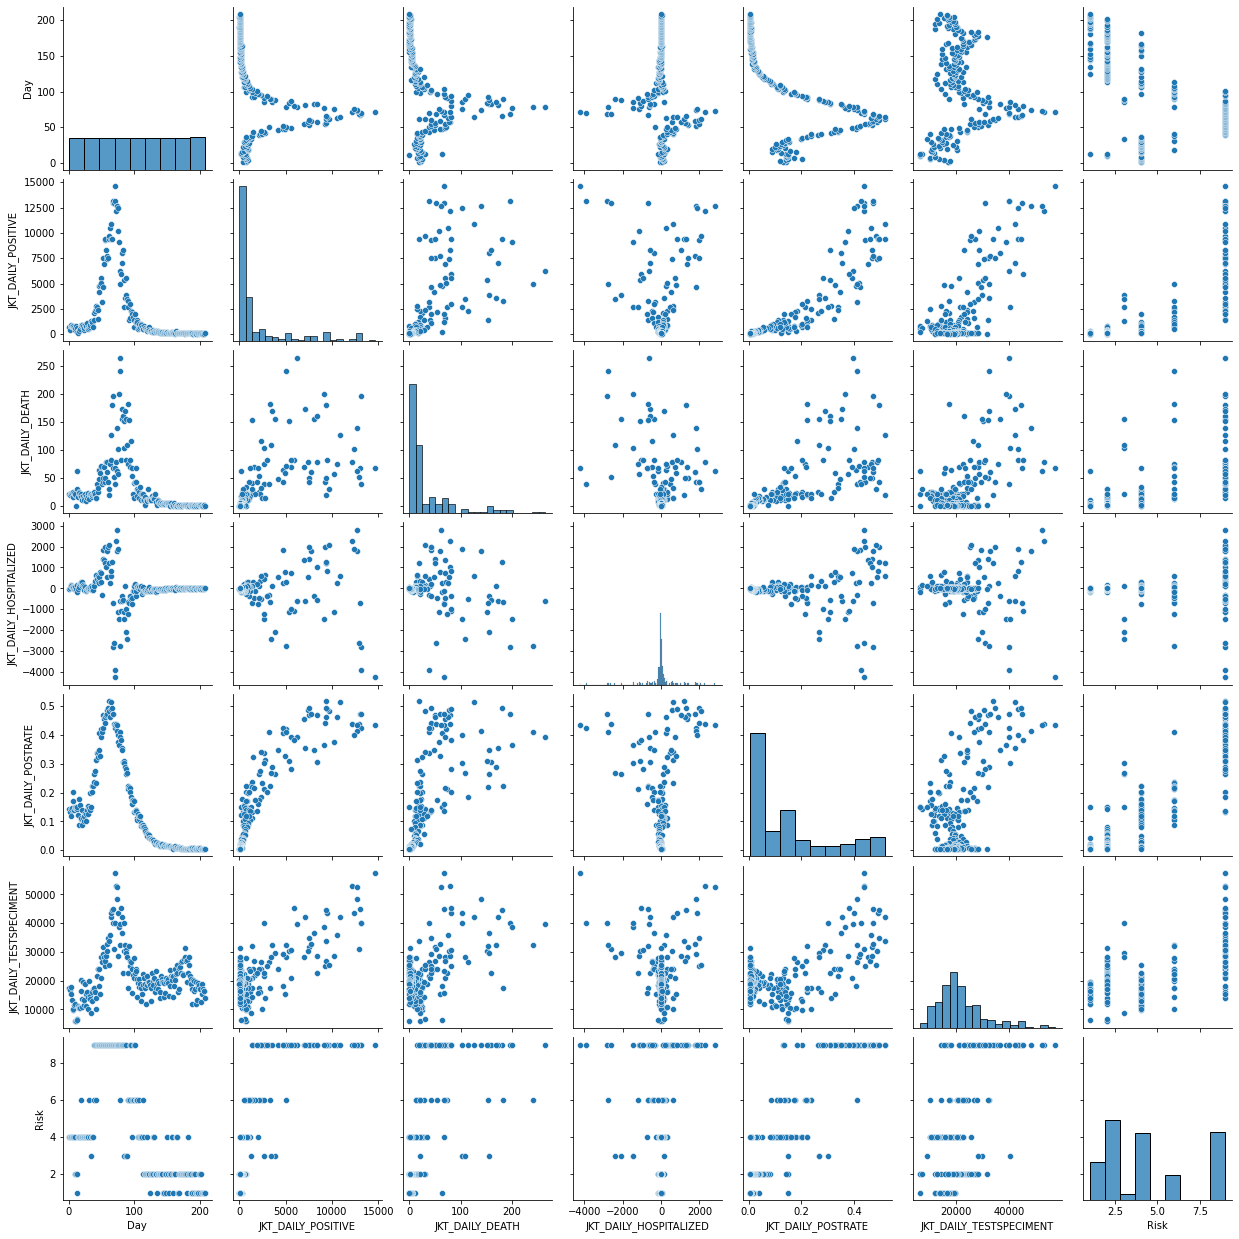

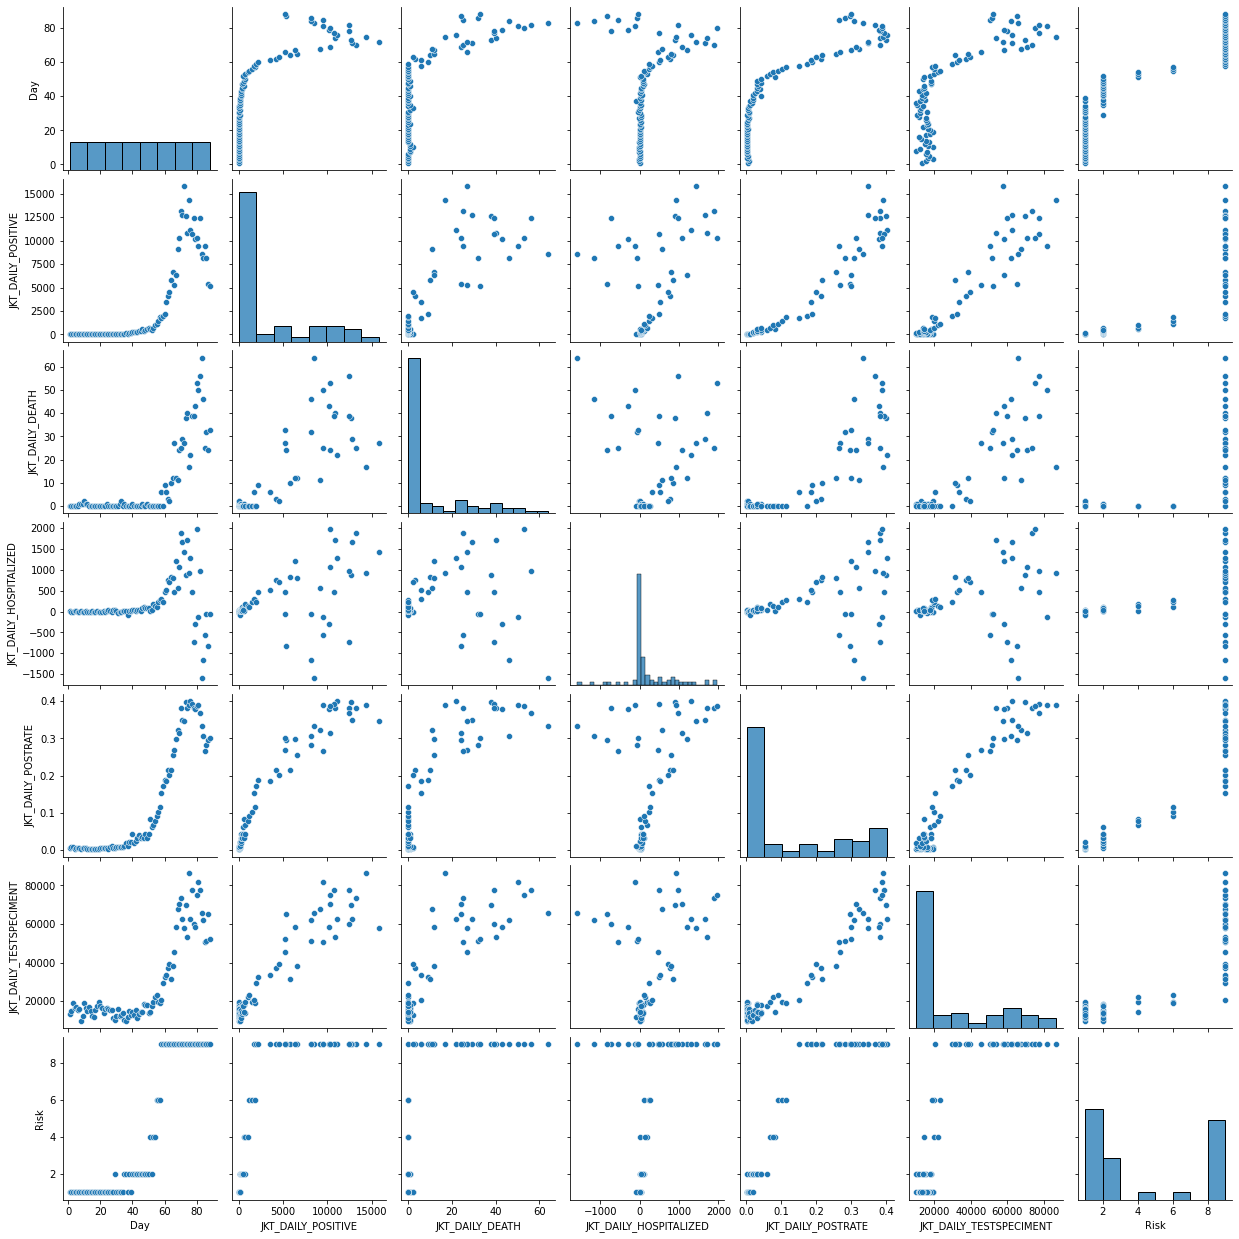

In [14]:
sns.pairplot(covid_ABG)
sns.pairplot(covid_Delta)
sns.pairplot(covid_Omicron)

In [15]:
corrdata_ABG = covid_ABG.corr()

corrdata_ABG

,Day,JKT_DAILY_POSITIVE,JKT_DAILY_DEATH,JKT_DAILY_HOSPITALIZED,JKT_DAILY_POSTRATE,JKT_DAILY_TESTSPECIMENT,Risk
Day,1.000000,0.697578,0.633007,-0.025807,0.156169,0.796621,0.623448
JKT_DAILY_POSITIVE,0.697578,1.000000,0.774591,0.118637,0.421018,0.758280,0.850583
JKT_DAILY_DEATH,0.633007,0.774591,1.000000,-0.006659,0.396994,0.638837,0.706979
JKT_DAILY_HOSPITALIZED,-0.025807,0.118637,-0.006659,1.000000,0.010235,0.017130,0.231857
JKT_DAILY_POSTRATE,0.156169,0.421018,0.396994,0.010235,1.000000,0.179798,0.512616
JKT_DAILY_TESTSPECIMENT,0.796621,0.758280,0.638837,0.017130,0.179798,1.000000,0.750498
Risk,0.623448,0.850583,0.706979,0.231857,0.512616,0.750498,1.000000


<AxesSubplot:>

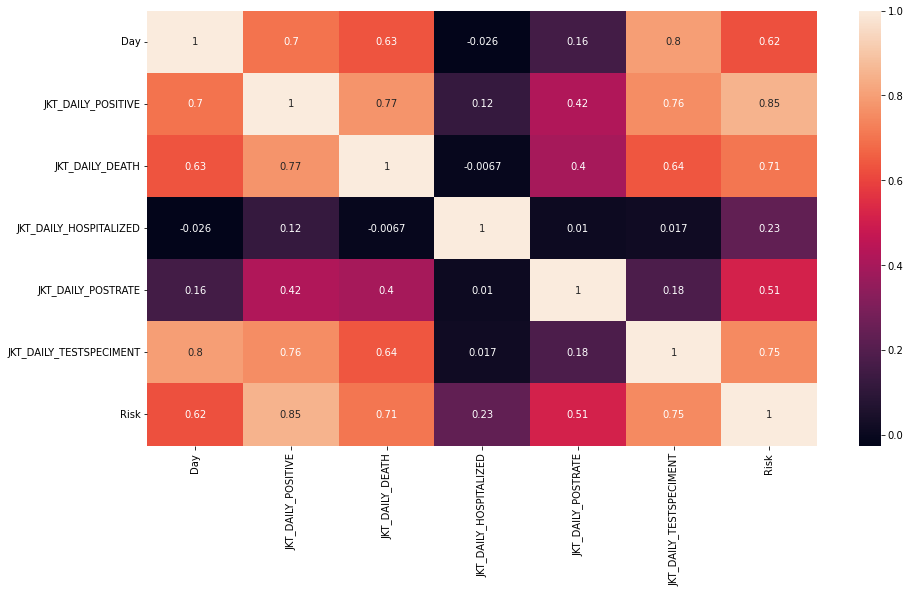

In [16]:
sns.heatmap(corrdata_ABG, annot=True)

In [17]:
corrdata_Delta = covid_Delta.corr()

corrdata_Delta

,Day,JKT_DAILY_POSITIVE,JKT_DAILY_DEATH,JKT_DAILY_HOSPITALIZED,JKT_DAILY_POSTRATE,JKT_DAILY_TESTSPECIMENT,Risk
Day,1.000000,-0.370518,-0.348633,-0.082729,-0.635953,-0.005741,-0.582365
JKT_DAILY_POSITIVE,-0.370518,1.000000,0.642573,-0.000653,0.880694,0.768844,0.786362
JKT_DAILY_DEATH,-0.348633,0.642573,1.000000,-0.231899,0.682968,0.587738,0.636489
JKT_DAILY_HOSPITALIZED,-0.082729,-0.000653,-0.231899,1.000000,0.091063,-0.070062,0.105146
JKT_DAILY_POSTRATE,-0.635953,0.880694,0.682968,0.091063,1.000000,0.609829,0.895443
JKT_DAILY_TESTSPECIMENT,-0.005741,0.768844,0.587738,-0.070062,0.609829,1.000000,0.586180
Risk,-0.582365,0.786362,0.636489,0.105146,0.895443,0.586180,1.000000


<AxesSubplot:>

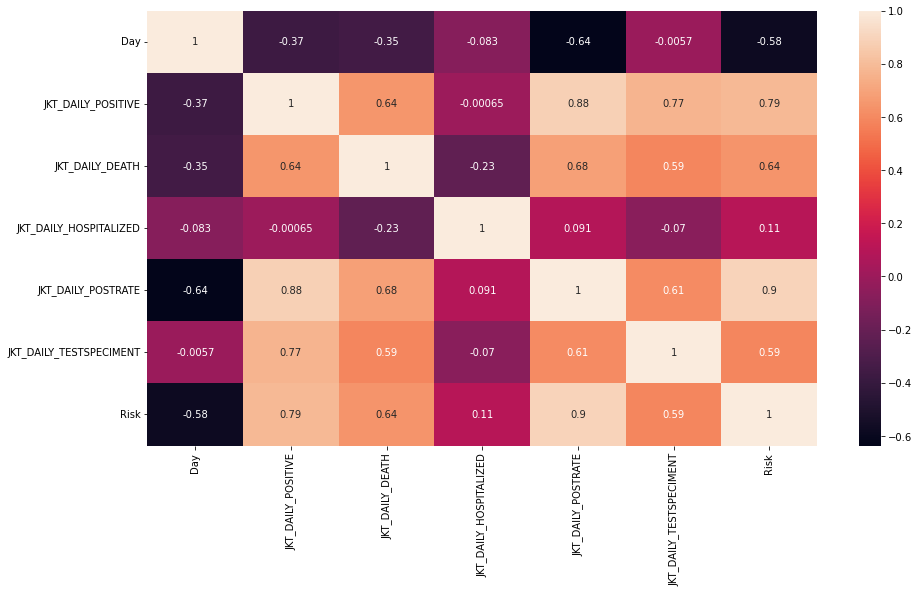

In [18]:
sns.heatmap(corrdata_Delta, annot=True)

In [19]:
corrdata_Omicron = covid_Omicron.corr()

corrdata_Omicron

,Day,JKT_DAILY_POSITIVE,JKT_DAILY_DEATH,JKT_DAILY_HOSPITALIZED,JKT_DAILY_POSTRATE,JKT_DAILY_TESTSPECIMENT,Risk
Day,1.000000,0.790546,0.743704,0.285657,0.878693,0.801923,0.898083
JKT_DAILY_POSITIVE,0.790546,1.000000,0.846862,0.490098,0.958261,0.947015,0.850566
JKT_DAILY_DEATH,0.743704,0.846862,1.000000,0.178094,0.871388,0.876869,0.747626
JKT_DAILY_HOSPITALIZED,0.285657,0.490098,0.178094,1.000000,0.442686,0.401297,0.410240
JKT_DAILY_POSTRATE,0.878693,0.958261,0.871388,0.442686,1.000000,0.964022,0.940991
JKT_DAILY_TESTSPECIMENT,0.801923,0.947015,0.876869,0.401297,0.964022,1.000000,0.864299
Risk,0.898083,0.850566,0.747626,0.410240,0.940991,0.864299,1.000000


<AxesSubplot:>

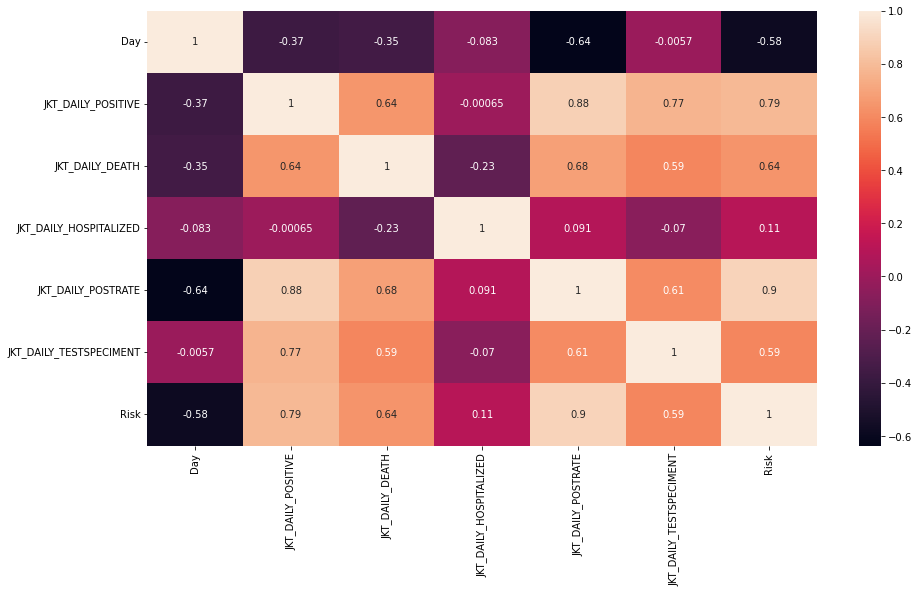

In [20]:
sns.heatmap(corrdata_Delta, annot=True)